In [1]:
# Dependencies
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os
import pickle

In [2]:
#df = pd.read_csv(os.path.join(".", "Resources", "ufo-sightings.csv"))
url = 'https://raw.githubusercontent.com/lucyhohler/Final-Project---Data-Analytics/master/Resources/ufo-sightings.csv'
df = pd.read_csv(url, sep=",", na_filter=False)
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,month,season,time of day,part of day
0,1/10/1947 20:00,conroe,tx,us,other,4,3 to4 sec.,The date was early 1947 before Arnold&#39s &qu...,4/16/2005,30.3116667,-95.4558333,1,Winter,8:00 PM,EVENING
1,1/10/1959 18:30,south san francisco,ca,us,disk,120,2 minutes,Its was approximately 6:30pm&#44 I was sitting...,4/27/2004,37.6547222,-122.4066667,1,Winter,6:30 PM,EVENING
2,1/10/1964 20:00,el cerrito (over old berkeley dump),ca,us,fireball,120,2 minutes,bal of fire in the sky no reported air crashes...,5/15/2006,37.9158333,-122.3105556,1,Winter,8:00 PM,EVENING
3,1/10/1980 0:00,exeter,nh,us,disk,7800,10min to 2hrs,saw what appeared as very bright star&#44 some...,2/18/2001,42.9813889,-70.9483333,1,Winter,12:00 AM,NIGHT
4,1/10/1981 20:30,glendora,ca,us,unknown,60,1 minute,On a very foggy night in 1981 I was illuminate...,2/18/2001,34.1361111,-117.8644444,1,Winter,8:30 PM,EVENING


In [3]:
df = df.drop(columns=["datetime", "country", "duration (seconds)", "duration (hours/min)", "comments", "date posted", "latitude", "longitude ", "month"])
df.head()

,city,state,shape,season,time of day,part of day
0,conroe,tx,other,Winter,8:00 PM,EVENING
1,south san francisco,ca,disk,Winter,6:30 PM,EVENING
2,el cerrito (over old berkeley dump),ca,fireball,Winter,8:00 PM,EVENING
3,exeter,nh,disk,Winter,12:00 AM,NIGHT
4,glendora,ca,unknown,Winter,8:30 PM,EVENING


In [4]:
df['outcome'] = '1'
df.head()

,city,state,shape,season,time of day,part of day,outcome
0,conroe,tx,other,Winter,8:00 PM,EVENING,1
1,south san francisco,ca,disk,Winter,6:30 PM,EVENING,1
2,el cerrito (over old berkeley dump),ca,fireball,Winter,8:00 PM,EVENING,1
3,exeter,nh,disk,Winter,12:00 AM,NIGHT,1
4,glendora,ca,unknown,Winter,8:30 PM,EVENING,1


In [5]:
import math

for index, row in df.iterrows():
    outcome = '1' 
    #print(row['shape'])
    if not row['shape'] or row['shape'] == 'other' or row['shape'] == 'unknown' or row['shape'] == ' ' :
        outcome = '0'
    row['outcome'] = outcome

df.head(20)

,city,state,shape,season,time of day,part of day,outcome
0,conroe,tx,other,Winter,8:00 PM,EVENING,0
1,south san francisco,ca,disk,Winter,6:30 PM,EVENING,1
2,el cerrito (over old berkeley dump),ca,fireball,Winter,8:00 PM,EVENING,1
3,exeter,nh,disk,Winter,12:00 AM,NIGHT,1
4,glendora,ca,unknown,Winter,8:30 PM,EVENING,0
5,crosby,tx,cylinder,Winter,8:00 PM,EVENING,1
6,el centro (approaching from west),ca,sphere,Winter,5:00 PM,EVENING,1
7,williamsfield,il,unknown,Winter,10:10 PM,NIGHT,0
8,jackson,nj,fireball,Winter,11:00 PM,NIGHT,1
9,san diego,ca,light,Winter,11:30 PM,NIGHT,1


In [6]:
target = df["outcome"]
target.head()

0    0
1    1
2    1
3    1
4    0
Name: outcome, dtype: object

In [7]:
data = df.drop("outcome", axis=1)
feature_names = data.columns
data.head()

,city,state,shape,season,time of day,part of day
0,conroe,tx,other,Winter,8:00 PM,EVENING
1,south san francisco,ca,disk,Winter,6:30 PM,EVENING
2,el cerrito (over old berkeley dump),ca,fireball,Winter,8:00 PM,EVENING
3,exeter,nh,disk,Winter,12:00 AM,NIGHT
4,glendora,ca,unknown,Winter,8:30 PM,EVENING


In [8]:
from sklearn.preprocessing import LabelEncoder

le_dict = {}

for col in data.columns:
    le = LabelEncoder()
    le = le.fit(data[col])
    data[col] = le.transform(data[col])
    le_dict[col] = le
    
# Use for Later (Predictions)
# for col in pred_data.columns:
#     le = le_dict[col]
#     pred_data[col] = le.transform(pred_data[col])

In [9]:
data.head()

,city,state,shape,season,time of day,part of day
0,2140,45,21,4,1130,2
1,9525,5,13,4,962,2
2,2942,5,15,4,1130,2
3,3193,31,13,4,233,4
4,3801,5,29,4,1184,2


In [10]:
le_dict['city'].classes_

array([' ', 'abbeville', 'abbeville (lake secession)', ..., 'zortman',
       'zumbrota', 'zwolle'], dtype=object)

In [11]:
le_dict['season'].classes_

array([' ', 'Fall   ', 'Spring', 'Summer ', 'Winter'], dtype=object)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

k: 1, Train/Test Score: 1.000/0.754
k: 3, Train/Test Score: 0.871/0.797
k: 5, Train/Test Score: 0.850/0.820
k: 7, Train/Test Score: 0.844/0.828
k: 9, Train/Test Score: 0.841/0.832
k: 11, Train/Test Score: 0.840/0.834
k: 13, Train/Test Score: 0.839/0.835
k: 15, Train/Test Score: 0.838/0.835
k: 17, Train/Test Score: 0.838/0.835
k: 19, Train/Test Score: 0.838/0.836


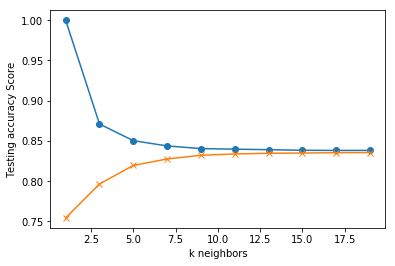

In [13]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [18]:
# Note that k: 11 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=11)
#knn.fit(X_train, y_train)
knn.fit(data, target)
print('k=11 Test Acc: %.3f' % knn.score(X_test, y_test))

k=11 Test Acc: 0.838


## Save the Trained Model

In [19]:
# Save the Model
model = knn
model.fit(X_train, y_train)
# save the model to disk
filename = 'knn_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [20]:
# Save the Dictionary for Label Encoder
filename = 'le_knn.sav'
pickle.dump(le_dict, open(filename, 'wb'))

In [21]:
# change file name and load test data
filename = 'knn_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8338151177809213
